In [ ]:
!pip install --upgrade Simpy

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import numpy as np
import random
import sys
import simpy

# Utilities

In [ ]:
(sys.setrecursionlimit(4000))

print(sys.getrecursionlimit())

4000


In [ ]:
def isZero(x, ε = 0.00001):
    return abs(x)<ε

## Bell Curve Random Generator

In [ ]:
gen_x_tab = None
gen_y_tab = None

def pdfv(x, mean=0, sd=None, delta=None):
    
    if sd is None and delta is None:
        sd = 1
    elif sd is None and delta is not None:
        sd = delta/math.sqrt(6)*0.9275
    
    τ = math.sqrt(6)
    x = (x-mean)/sd*0.9275
    return np.where(abs(x)<τ, 5/(8*τ*sd)*(1-x**2/2+x**4/24+1/2)*0.9275, 0)

def rv(mean=0, sd=None, delta=None, alternating=None, rounding=None):
    
    if sd is None and delta is None:
        sd = 1
    elif sd is None and delta is not None:
        sd = delta/math.sqrt(6)*0.9275

    global gen_count, gen_x_tab, gen_y_tab
    
    if gen_x_tab is None:
        
        # initialise global variables 
        gen_x_tab = list(np.linspace(-math.sqrt(6), -1.51, 500)) + \
                    list(np.linspace(-1.5, 0, 151)) 

        τ = math.sqrt(6)
        
        def cdf(x):
            return 5/(8*τ)*(x**5/120-x**3/6+x*3/2)+5/(8*τ)*(τ**5/120-τ**3/6+τ*3/2)
        
        gen_y_tab = [ cdf(x) for x in gen_x_tab ]
        
    y, sign = random.random(), 1
    if y>0.5:
        y, sign = 1-y, -1
    if alternating is not None:
        sign = 1 if alternating%2==0 else -1

    for i in range(1, len(gen_x_tab)):
        if y < gen_y_tab[i]:
            x0 = gen_x_tab[i]
            y0 = gen_y_tab[i]
            x1 = gen_x_tab[i-1]
            y1 = gen_y_tab[i-1]
            x = mean+sign*((x0+(y-y0)*(x1-x0)/(y1-y0))*sd/0.9275)
            if type(rounding) is int and rounding>0:
                return round(x, rounding)
            else:
                return x

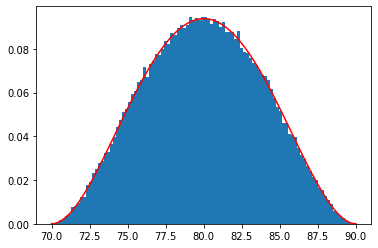

In [ ]:
rv80 = [ rv(mean=80, delta=10) for i in range(100000) ]
_ = plt.hist(rv80, bins=100, density=True)

X = np.linspace(70, 90, 100)
Y = pdfv(X, mean=80, delta=10)
_ = plt.plot(X, Y, color='red')

In [ ]:
free_speed = [ 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170 ]
quantiles = np.cumsum([0, 0.002, 0.015, 0.025, 0.178, 0.372, 0.390, 0.119
, 0.148, 0.03, 0.001])
def random_speed():
  u = random.random() # uniformly distributed random number generated between 0 and 1
  for i in range(len(quantiles)):
    if u<quantiles[i+1]:
      p = (u-quantiles[i])/(quantiles[i+1]-quantiles[i])
      return free_speed[i]*p+free_speed[i+1]*(1-p)

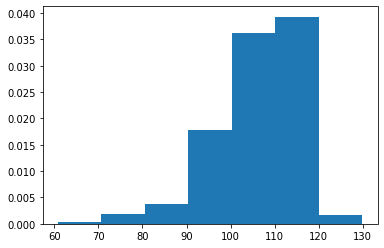

In [ ]:
random.seed(0)
speeds = [ random_speed() for i in range(1200)]
hist = plt.hist(speeds, bins=7, density=True)


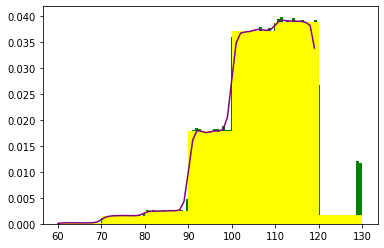

In [ ]:
random.seed(0)
speeds = [ random_speed() for i in range(210000)]
hist = plt.hist(speeds, bins=100, density=True, color='green')
kernel = stats.gaussian_kde(speeds)
plt.hist(speeds, bins=7, density=True, color='yellow')
x = np.arange(60, 120, 1)
y = kernel(x)
plot = plt.plot(x, y, color='purple')

In [ ]:
v1 = np.arange(60, 170) #generate spread out from 60 170
q1 = [ kernel.integrate_box_1d(30, i) for i in v1 ]
def freeMotorwaySpeed():
  u = random.random() # generates uniformly distributed random number between 0 and 1
  for i in range(len(q1)):
    if u<q1[i+1]:
      p1 = (u-q1[i])/(q1[i+1]-q1[i])
      # return (free_speed[i+1]+free_speed[i])/2*p+(1-p)*(free_speed[i+1]+free_speed[i+2])/2
      return v1[i]*p1+v1[i+1]*(1-p1)


freeMotorwaySpeed()


84.19903863508866

## Free Speed Generator

In [ ]:
free_speed_bins = [ 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
free_speed_quantiles = np.cumsum([0, 0.006, 0.014, 0.052, 0.148, 0.27, 0.309, 0.143, 0.048, 0.01])

def free_speed_distribution():
    u = random.random() # generates uniformly distributed random number between 0 and 1
    for i in range(len(free_speed_quantiles)):
        if u<free_speed_quantiles[i+1]:
            p = (u-free_speed_quantiles[i])/(free_speed_quantiles[i+1]-free_speed_quantiles[i])
            return free_speed_bins[i]*p+free_speed_bins[i+1]*(1-p)
        
free_speed_data = [ free_speed_distribution() for i in range(1200)]
free_speed_kernel = stats.gaussian_kde(free_speed_data)

free_speeds = np.arange(30, 191)
free_speed_cdf = [ free_speed_kernel.integrate_box_1d(30, i) for i in free_speeds ]

def random_free_speed():
    u = random.random() # generates uniformly distributed random number between 0 and 1
    for i in range(len(free_speeds)):
        if u<free_speed_cdf[i+1]:
            p = (u-free_speed_cdf[i])/(free_speed_cdf[i+1]-free_speed_cdf[i])
            return free_speeds[i]*p+free_speeds[i+1]*(1-p)

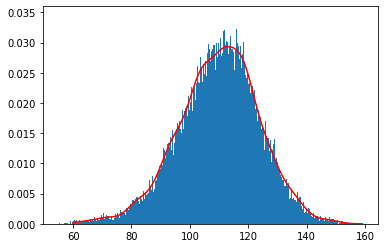

In [ ]:
speeds = [ random_free_speed() for i in range(100000) ]
_ = plt.hist(speeds, bins=1000, density=True)
x = np.arange(60, 160, 1)
y = free_speed_kernel(x)
_ = plt.plot(x, y, color='red')

In [ ]:
# maximum speed can be different because of types of vehicles.
def LMVLength():
 unif = random.random()
 l = 21 + unif * 2
 return l
def SUVLength():
 unif = random.random()
 l = 4.2 + unif * 2.5
 return l
def carLength():
 unif = random.random()
 l = 4.3 + unif * 0.6
 return l


#Vehicle 

Vehicle Type

In [ ]:
def vtype(p_truck, p_suv, p_car, p_human = 1):
  w = random.random()
  vFAR_AWAY_IN_FRONT = 200
  vFAR_AWAY_IN_BACK = 80
 
  if w <= p_human:
    vdrivers = 'Human'
  else:
    vdrivers = 'CAD'

  u = random.random()
  if u <= p_truck:
    vtype = 'TRUCK'
    vstartspeed = freeMotorwaySpeed()/3.6 #### vstartspeed = freeMotorwaySpeedLorry()/3.6
    vlength = LMVLength()
    va_max = 0.96
 
    if vdrivers == 'Human':
      va_min = -0.88 + 0.125*random.random()
    else:
      va_min = -0.88
      vFAR_AWAY_IN_FRONT = 200
      vFAR_AWAY_IN_BACK = 110

  elif u <= p_truck + p_suv: #######??????
    vtype = 'SUV'
    vstartspeed = freeMotorwaySpeed()/3.6
    vlength = SUVLength()
    va_max = 2.47
    if vdrivers =='Human':
      va_min = -3.97 + 0.5*random.random()
    else:
      va_min = -3.97
      vFAR_AWAY_IN_FRONT = 200
      vFAR_AWAY_IN_BACK = 80
  else:
    vtype = 'Car'
    vstartspeed = freeMotorwaySpeed()/3.6
    vlength = carLength()
    va_max = 2.47
    if vdrivers == 'Human':
      va_min = -3.97 + 0.5*random.random()
    else:
      va_min = -3.97
      vFAR_AWAY_IN_FRONT = 200
      vFAR_AWAY_IN_BACK = 80

  return vtype, vstartspeed, vlength, va_max, va_min, vFAR_AWAY_IN_FRONT, vFAR_AWAY_IN_BACK, vdrivers


In [ ]:
CRITICAL_TIME_TOLERANCE = 4 #[S]
LANE_CHANGE_TIME = 3
MIN_TIME_DIFF = 1 #TRIGGER OVERTAKING RELATED TO SPEED DIFFERENCE
MIN_SPEED_DIFF = 2
CAR_LENGTH = 100
FAR_AWAY_IN_FRONT = 200 ##DISTANCE AT WHICH A CAR IN FRONT CAN BE IGNORED
FAR_AWAY_IN_BACK = 80 #DISTANCE AT WHICH A CAR BEHIND AN BE IGNORED


In [ ]:
def isRunning(p):
 return p is not None and p.running

def isCrashed(p):
   return p is not None and p.crashed


In [ ]:
class Vehicle:
    def __init__(self, rec, 
                 startingLane=None, startingPos=0,
                 t0=0, x0=0, dx0=0, ddx0=0, dddx0=0, 
                 vmax=None, vmax_var=None,
                 t=[], v=[]):
        
        global VEHICLE_ID
        self.id = VEHICLE_ID
        VEHICLE_ID += 1
        
        self.a_brake = -4.0 # [m/s²]   Tesla: -8.0 # [m/s²]
        self.a_coast = -0.6 # [m/s²]   Tesla: -1.8 # [m/s²]   
        self.a_max =    2.5 # [m/s²]   Tesla:  4.6 # [m/s²] 
                            # Note: 2.5m/s² corresponds to 0-100km/h om 11s
        self.length = 4 # [m]  Length of the vehicle 
        
        self.absolute_speed_time_tolerance = 2 # [s]
        self.relative_speed_time_tolerance = 5 # [s]
        self.far_away_in_front = 200 # [m]
        self.far_away_in_back = 80 # [m]
        self.min_action_time = 0.5 # [s]  
        
        self.lane_change_time = 3 # [s] 
        self.min_speed_diff = 2 # [m/s]
        
        ## if not None the preferred max free velocity
        self.vmax = vmax
        self.vmax_variation = vmax_var if vmax_var is not None else 0.05
        self.timing = 100 # [s]
        self.timing_variation = 0.30 
        
        self.env = rec.env
        self.rec = rec
            
        self.startingLane = startingLane
        self.startingPos = startingPos
        self.lane = None
        self.pos = 0
        
        # speedLimit once recognised
        self.speedLimit = None
        
        ## second lane reference during changing of lanes
        self.oldLane = None
        
        self.alternator = 0
            
        self.t0 = t0
        self.x0 = x0    # [m] the reference point is on the front of the vehicle
                        # the body of the vehicle of the given length is behind.
        self.dx0 = dx0
        self.ddx0 = ddx0
        self.dddx0 = dddx0

        self.t_target = t
        self.v_target = v
        # while there is an adjustment of velocity in progress
        # the current_target is set
        self.current_target = None

        # trace flags
        self.traceAdjustVelocity = False
        self.traceInterrupt = False
        self.traceBraking = False
        self.traceCrash = False
        self.traceSurround = False
        self.traceOvertaking = False
 
        # start process
        self.running = False
        self.crashed = False
                
        # Flags used for temporarily exclusive behaviour
        self.laneChangeControl = False 
                # This flag is used to block automatic overtaking
                # while processing explicit lane change control
        self.braking = False
                # This flag is used to prevent interrupting braking for braking
        self.changingLane = False
                # This flag is used to prevent interrupting lanechanging
        
        self.processRef = None
        self.env.process(self.process())
    
    def trace(self, message):
        print(f"t={self.t0:7,.1f}s x={self.x0:7,.1f}m v{self.id:d}", message)
        
    def isNotFasterThan(self, other):
        return True if other is None else self.dx0 <= other.dx0
    
    def isNotSlowerThan(self, other):
        return True if other is None else other.dx0 <= self.dx0
    
    ## adapted to handle lane information
    def updateOnly(self):
        t = self.env.now
        if t < self.t0 or not self.running:
            return False
        if t > self.t0:
            dt = t - self.t0
            ddx = self.ddx0 + self.dddx0*dt
            dx = self.dx0 + self.ddx0*dt + self.dddx0*dt*dt/2
            Δx = self.dx0*dt + self.ddx0*dt*dt/2 + self.dddx0*dt*dt*dt/6
            x = round(self.x0 + Δx, 2)
            self.t0, self.x0, self.dx0, self.ddx0 = t, x, dx, ddx
            
            ## begin additional code
            self.pos = round(self.pos+Δx, 2)
            # update lane information if necessary
            if self.pos >= self.lane.length:
                nextPos = self.pos - self.lane.length
                nextLane = self.lane.next
                self.lane.leave(self)
                if nextLane is None:
                    self.oldLane = None
                    self.rec.record(self, event='end')
                    self.running = False
                    return False
                else:
                    nextLane.enter(self, pos=nextPos)
            ## end additional code
            
        return True
        
    ## minor change only
    def update(self):
        
        self.surround = Surround(self)
        
        ## instead of direct link, call method
        inFront = self.surround.front
        
        # if there is a running or crashed vehicle in front and
        # we have crashed into the rear end of that vehicle
        if inFront is not None and inFront.x0-inFront.length < self.x0:
            self.crash(inFront)

        # if the speedLimit changes...
        elif self.speedLimit != self.lane.speedLimit:
            self.speedLimit = self.lane.speedLimit
            if self.speedLimit is None:
                # end of speed limit, return to default behaviour
                if self.vmax is not None and self.vmax>self.dx0:
                    Δt = max(self.min_action_time, (self.vmax-self.dx0)/self.a_max)
                    self.setTarget(Δt, self.vmax)
            else:
                vmax = self.speedLimit/3.6
                vmax = rv(mean=vmax, delta=self.vmax_variation*vmax)
                if vmax<self.dx0:
                    # when the new speedLimit is lower than current speed, coast down
                    Δt = max(self.min_action_time, (self.dx0-vmax)/self.a_coast)
                    self.setTarget(Δt, vmax)
                else:
                    # when the new speedLimit is higher than current speed, accelerate at half max a_max
                    Δt = max(self.min_action_time, 2*(vmax-self.dx0)/self.a_max)
                    self.setTarget(Δt, vmax)
                
        # if at the end of the lane merging is required      
        elif self.lane.merge is not None and \
                not self.braking and not self.laneChangeControl and not self.changingLane:
            if self.lane.merge == 'R':
                if self.surround.rightLane is not None and \
                        self.surround.right is None and \
                        self.isNotFasterThan(self.surround.rightFront) and \
                        self.isNotSlowerThan(self.surround.rightBack):
                    self.setTarget(self.lane_change_time, 'fast')
            elif self.lane.merge == 'L':
                if self.surround.leftLane is not None and \
                        self.surround.left is None and \
                        self.isNotFasterThan(self.surround.leftFront) and \
                        self.isNotSlowerThan(self.surround.leftBack):
                    self.setTarget(self.lane_change_time, 'slow')                
        
        # start overtaking maneuver by changing into fast lane
        elif inFront is not None and \
                not self.braking and not self.laneChangeControl and not self.changingLane and \
                self.dx0 > inFront.dx0 + self.min_speed_diff and \
                self.x0 + (self.lane_change_time+self.absolute_speed_time_tolerance)*self.dx0 > inFront.x0-inFront.length and \
                self.surround.rightLane is not None and \
                self.surround.right is None and \
                self.isNotFasterThan(self.surround.rightFront) and \
                self.isNotSlowerThan(self.surround.rightBack):
            self.setTarget(self.lane_change_time, 'fast')

        # if there is a vehicle in front 
        # which drives slower and
        # the distance to that vehicle in front is at current speed
        # less than the critical time tolerance of this driver
        elif inFront is not None and \
                not self.braking and not self.laneChangeControl and not self.changingLane and \
                self.dx0 > inFront.dx0 and \
                self.x0 + self.absolute_speed_time_tolerance*self.dx0 > inFront.x0:
            # note that self.a_coast is a negative acceleration
            Δt = max(self.min_action_time, (inFront.dx0-self.dx0)/self.a_coast)
            if self.current_target is None or \
                    not isZero(self.current_target-inFront.dx0):
                self.setTarget(Δt, inFront.dx0)

        # end overtaking by returning to slow lane
        elif self.surround.leftLane is not None and \
                not self.braking and not self.laneChangeControl and not self.changingLane and \
                self.surround.leftLane.totalLength()-self.pos>100 and \
                self.surround.left is None and \
                self.isNotSlowerThan(self.surround.leftBack) and \
                self.surround.leftFront is None:
            self.setTarget(self.lane_change_time, 'slow')
     
    ## code remains unchanged
    def setTarget(self, t, v):
        self.t_target = [ t ] + self.t_target
        self.v_target = [ v ] + self.v_target
        self.interruptProcess()
      
    ## minor change only
    def process(self):

        # delay start to the given time t-
        if self.t0>self.env.now:
            yield self.env.timeout(self.t0-self.env.now)
        self.t0 = self.env.now
        self.running = True
        self.rec.startRecording(self)
        
        ## begin additional code
        ## enter the first lane
        self.startingLane.enter(self)
        ## end additional code
        
        while self.updateOnly():

            ## instead of direct link, call method
            inFront = self.lane.inFront(self.pos, self.far_away_in_front) \
                        if self.lane is not None else None
                
            # if the car in front is slower and we are a bit too near on its heals...
            if inFront is not None and inFront.dx0 < self.dx0 and \
                    inFront.x0-inFront.length < \
                        self.x0 + self.relative_speed_time_tolerance*(self.dx0-inFront.dx0):
                yield from self.emergencyBraking(inFront.dx0)
                if not isZero(self.dx0-inFront.dx0):
                    # after emergency breaking adjust to the speed of the car in front...
                    Δt = 1
                    self.setTarget(Δt, inFront.dx0)
                continue 
                    
            if len(self.t_target)>0:
                
                t_target = self.t_target[0]
                v_target = self.v_target[0]
                self.t_target = self.t_target[1:]
                self.v_target = self.v_target[1:]
                
                if type(v_target) is str:
                    
                    # explicit overtake commands temporarily
                    # disable overtaking
                    if v_target=='R':
                        self.laneChangeControl = True
                    elif v_target=='L':
                        self.laneChangeControl = False
                        
                    direction = normaliseDirection(v_target)
                    if self.lane.getLane(direction) is not None:
                        yield from self.changeLane(inFront, direction, t_target)
                
                ## the rest is what was there before
                else:
                    v0 = self.dx0
                    v1 = v_target
                    Δt = t_target
                    if isZero(v1-v0):
                        yield from self.continueAtSameSpeed(Δt)
                    else:
                        yield from self.adjustVelocity(v1-v0, Δt)
                    
            ## additional code
            elif self.vmax is not None:
                
                # if the explicit control strategy is exhausted and
                # a target maximum speed is set the vehicle will follow
                # a random speed around the target maximum speed

                ## additional code
                vmax = self.vmax
                if self.speedLimit is not None:
                    vmax = self.speedLimit/3.6
                    vmax = rv(mean=vmax, delta=self.vmax_variation*vmax)
                    
                # as long there is no vehicle in front or the vehicle in front
                # is far enough ahead
                if inFront is None or \
                    self.x0 + self.relative_speed_time_tolerance*(self.dx0-inFront.dx0) < inFront.x0:
                    v0 = self.dx0
                    self.alternator += 1
                    v1 = rv(mean=vmax, 
                            delta=self.vmax_variation*vmax, 
                            alternating=self.alternator,
                            rounding=2)
                    Δt = rv(mean=self.timing, 
                            delta=self.timing*self.timing_variation,
                            rounding=1)
                
                    yield from self.adjustVelocity(v1-v0, Δt)
                else:
                    yield from self.continueAtSameSpeed(10)
            else:
                yield from self.continueAtSameSpeed(10)
                
        self.rec.stopRecording(self)

    def crash(self, other):
        
        def recordCrash(v):
            v.rec.record(v, 'crash')
            v.running = False
            v.crashed = True
            # stop anything your are currently doing...
            v.interruptProcess()
            v.dx0 = 0
            v.ddx0 = 0
            v.dddx0 = 0
            
        if self.running:
            if self.traceCrash:
                self.trace(f"Crashed into v{other.id:d} at x={self.x0:7.1f}m")
            recordCrash(self)
            if other.running:
                recordCrash(other)
        
    def emergencyBraking(self, v):
        
        def emergencyBrakingProcess(v):
            
            if self.traceBraking:
                self.trace(f"Braking from v={self.dx0:4.1f}m/s to {v:4.1f}m/s")
           
            self.rec.record(self, 'brake')
            minΔt = 0.2
            self.dddx0 = (self.a_brake-self.ddx0)/minΔt      
            yield self.env.timeout(minΔt)
            
            self.updateOnly()
            self.dddx0=0
            self.ddx0=self.a_brake
            v = min(v, self.dx0-2)
                # the brake time estimate is for perfect timing for 
                # autonomous cars. For manual driving leave out the
                # -minΔt/2 or use a random element.
            Δt = max(0.5, (v-self.dx0)/self.ddx0 - minΔt/2)
            yield self.env.timeout(Δt)
                
            self.updateOnly()
            self.dddx0 = -self.ddx0/minΔt      
            yield self.env.timeout(minΔt)
      
            self.updateOnly()
            self.ddx0 = 0
            self.dddx0 = 0
            self.rec.record(self, 'brake end')
            
            if self.traceBraking:
                self.trace(f"Braking end  v={self.dx0:4.1f}m/s")

        ## The 'braking' bit prevents the interruption of an emergency breaking process 
        self.braking = True
        self.processRef = self.env.process(emergencyBrakingProcess(v))
        try:
            yield self.processRef
        except simpy.Interrupt:
            if self.traceInterrupt or self.traceBraking:
                self.trace(f"Braking interrupted at v={self.dx0:4,.1f}m/s")
            pass
        self.processRef = None
        self.braking = False
        
    def changeLane(self, inFront, direction, Δt):
     
        def changeLaneProcess(oldLane, newlane, Δt, trace=True):
            # self.updateOnly()
            if trace and self.traceOvertaking and inFront is not None and  direction=='fast':
                other = f"v{inFront.id:d} " if inFront is not None else ""
                self.trace(f"Overtaking {other:s} at x={self.x0:7,.1f}m")
                
            self.rec.record(self, 'change '+direction)
            self.oldLane = oldLane
            newLane.enter(self, pos=self.pos, laneChange=True) 
            self.ddx0 = 1
            self.dddx0 = 0
            yield self.env.timeout(Δt)
            
            self.updateOnly()
            if not self.running:
                return
            currentLane = self.lane
            self.oldLane.leave(self, laneChange=True)
            self.lane = currentLane
            self.oldLane = None
            self.ddx0 = 0
            self.dddx0 = 0
            self.rec.record(self, 'done change '+direction)
            
            if trace and self.traceOvertaking and direction=='slow':
                self.trace(f"Overtaking done return to slow lane at x={self.x0:7,.1f}m")
            # self.updateOnly()
        
        ## keep record of current lane, as in case of aborting
        ## the lane change 
        ## when interrupted go back into original lane
        self.changingLane = True
        self.updateOnly()
        oldLane = self.lane
        newLane = self.lane.getLane(direction)
        try:
            self.processRef = self.env.process(changeLaneProcess(oldLane, newLane, Δt))
            yield self.processRef
            self.processRef = None
        except simpy.Interrupt:
            if self.traceInterrupt and self.traceOvertaking:
                self.trace(f"Overtaking interrupted at x={self.x0:7,.1f}m")
            # if interrupted go quickly back into old lane
            # but this is not interruptible
            self.updateOnly()
            # it is possible that there was an intermittent change lane event
            while self.lane != newLane and newLane is not None:
                newLane = newLane.next
                oldLane = oldLane.next
            self.processRef = None
            self.env.process(changeLaneProcess(newLane, oldLane, Δt/4, trace=False))
        self.changingLane = False    
        
    # smoothly adjust velocity by Δv over the time Δt
    def adjustVelocity(self, Δv, Δt):
        
        # smoothly adjust velocity by Δv over the time Δt
        def adjustVelocityProcess():
            
            self.updateOnly()
            
            if self.traceAdjustVelocity:
                self.trace(f"Adjusting Velocity from v={self.dx0:4,.1f}m/s by Δv={Δv:4,.1f}m/s over {Δt:4,.1f}s")
            
            minΔt = 0.1*Δt
            a = Δv/(Δt-minΔt)
            tt = Δt-2*minΔt
            
            self.dddx0 = (a-self.ddx0)/minΔt   
            yield self.env.timeout(minΔt)
        
            self.updateOnly()
            self.dddx0 = 0
            self.ddx0 = a
            yield self.env.timeout(tt)
        
            self.updateOnly()
            self.dddx0 = -a/minΔt
            yield self.env.timeout(minΔt)
        
            self.updateOnly()
            self.dddx0 = 0
            self.ddx0 = 0
                    
            if self.traceAdjustVelocity:
                self.trace(f"Adjusted  Velocity to   v={self.dx0:4,.1f}m/s")
        
        # start process
        self.current_target = self.dx0 + Δv
        self.processRef = self.env.process(adjustVelocityProcess())
        try:
            # wait for the process to finish
            yield self.processRef
        except simpy.Interrupt:
            # in case this has been interrupted
            if self.traceInterrupt:
                self.trace(f"Adjusting Velocity interrupted at v={self.dx0:4,.1f}m/s")
            pass
        self.current_target = None
        self.processRef = None

    def continueAtSameSpeed(self, Δt):
        
        def continueAtSameSpeedProcess():
            # don't change the current velocity
            self.dddx0 = 0
            self.ddx0 = 0
            yield self.env.timeout(Δt)
        
        # start process
        self.processRef = self.env.process(continueAtSameSpeedProcess())
        try:
            # wait for the process to finish
            yield self.processRef
        except simpy.Interrupt:
            # in case this has been interrupted
            if self.traceInterrupt:
                self.trace(f"Constant Velocity interrupted at v={self.dx0:4,.1f}m/s")
            pass
        self.processRef = None

    def interruptProcess(self):
        if self.processRef is not None and self.processRef.is_alive:
            self.processRef.interrupt('There are more important things to do...')

## Lanes

In [ ]:
def normaliseDirection(d):
    d = d.lower()
    if d=='r' or d=='fast':
        return 'fast'
    elif d=='l' or d=='slow':
        return 'slow'
    else:
        return None

In [ ]:
LANE_ID = 0

class Lane:
    
    def __init__(self, rec, length, speedLimit=None, merge=None):
        
        global LANE_ID
        self.id = LANE_ID
        LANE_ID += 1
      
        self.rec = rec
        self.x0 = 0
        self.length = length
        
        # speed limit on this lane segment in km/h
        self.speedLimit = speedLimit 
        
        # indicates that at the end of the lance traffic has to merge to the left or right
        self.merge = merge 
        
        self.vehicles = []
        
        self.next = None
        self.prev = None
                
        # lane attached to the left/right
        self.left = None
        self.right = None
        
        rec.recordLane(self)
      
    # defines generic str() method for Lanes
    def __str__(self):
        l = " L:--" if self.left is None else f" L:{self.left.id:0>2d}"
        r = " R:--" if self.right is None else f" R:{self.right.id:0>2d}"
        s = "" if self.speedLimit is None else f" speedLimit:{self.speedLimit:d}km/h"
        return f"[{self.id:0>2d} x={self.x0:3.1f}m l={self.length:3.1f}m"+l+r+s+"]" + \
                    ("\\" if self.merge=='R' else "") + \
                    ("/" if self.merge=='L' else "") + \
                    ("-" + str(self.next) if self.next is not None else "")
    
    def getLane(self, direction):
        if direction=='slow':
            return self.left
        elif direction=='fast':
            return self.right
        else:
            return None

    ## additional code    
    # adding parallel lane on right side
    def attachRight(self, lane):
        self.right = lane
        lane.left = self
        lane.x0 = self.x0
        lane.speedLimit = self.speedLimit
 
    ## additional code 
    # adding parallel lane on right side
    def attachLeft(self, lane):
        self.left = lane
        lane.right = self
        lane.x0 = self.x0
        lane.speedLimit = self.speedLimit
     
    ## additional code 
    # constructs a number of lane segments of the same length
    # and attaches them to the right
    def widenRight(self):
        lane = self
        newLane = Lane(self.rec, lane.length)
        lane.attachRight(newLane)
        while lane.next is not None:
            lane = lane.next
            newLane = Lane(self.rec, lane.length)
            lane.attachRight(newLane)
            newLane.prev = lane.prev.right
            newLane.prev.next = newLane
        return self.right
            
    ## additional code 
    # constructs a number of lane segments of the same length
    # and attaches them to the right
    def widenLeft(self):
        lane = self
        newLane = Lane(self.rec, lane.length)
        lane.attachLeft(newLane)
        while lane.next is not None:
            lane = lane.next
            newLane = Lane(self.rec, lane.length)
            lane.attachLeft(newLane)
            newLane.prev = lane.prev.left
            newLane.prev.next = newLane
        return self.left
            
    # defines concatenation of lanes
    def extend(self, lane):
        l = self
        while l.next is not None:
            l = l.next
        l.next = lane
        lane.x0 = l.x0+l.length
        lane.prev = l
        return self
        
    def totalLength(self):
        total = self.length
        l = self
        while l.next is not None:
            l = l.next
            total += l.length
        return total
    
    def between(self, posBack, posFront):
        # make sure that the position of all cars is accurate 
        # at this point in time
        for v in self.vehicles:
            v.updateOnly()
                # normally the list should be sorted, but just in case
        self.vehicles.sort(key=lambda v: v.pos)
        res = []
        for v in self.vehicles:
            if posBack < v.pos and v.pos-v.length < posFront:
                res.append(v)
        # if the required distance reaches over the end of the lane segment
        if posFront > self.length and self.next is not None:
            return res + self.next.between(0, posFront-self.length)
        elif posBack < 0 and self.prev is not None:
            return self.prev.between(self.prev.length+posBack, self.prev.length) + res
        else:
            return res
        
    def inFront(self, pos, far):
        # make sure that the position of all cars is accurate 
        # at this point in time
        for v in self.vehicles:
            v.updateOnly()
        # normally the list should be sorted, but just in case
        self.vehicles.sort(key=lambda v: v.pos)
        for v in self.vehicles:
            if v.pos > pos:
                return v if v.pos-pos<far else None
        # there is none in front in this lance
        # if the free lane in front is long enough or there is no next lane
        if self.length-pos>far or self.next is None:
            return None
        else:
            return self.next.inFront(0, far-(self.length-pos))

    def behind(self, pos, far):
        # make sure that the position of all cars is accurate 
        # at this point in time
        for v in self.vehicles:
            v.updateOnly()
        # This time we sort in reverse order
        self.vehicles.sort(key=lambda v: v.pos, reverse=True)
        for v in self.vehicles:
            if v.pos < pos:
                return v if pos-v.pos<far else None
        # there is none behind in this lance
        # if the free lane in behind is long enough or there is no previous lane
        if pos>far or self.prev is None:
            return None
        else:
            return self.prev.behind(self.prev.length, far-pos)
        
    def enter(self, vehicle, pos=0, laneChange=False):
        self.vehicles.insert(0, vehicle)
        vehicle.pos = pos
        vehicle.lane = self
        vehicle.rec.record(vehicle, event="enter lane"+(f" {self.id:d}" if laneChange else ""))

    def leave(self, vehicle, laneChange=False):
        vehicle.rec.record(vehicle, event="leave lane"+(f" {self.id:d}" if laneChange else ""))
        vehicle.lane = None
        self.vehicles.remove(vehicle)

#Surround

In [ ]:
class Surround:
    
    def __init__(self, vehicle):
        
        # For each of the directions None means that there is no 
        # vehicle in the immediate vicinity.
        # We initialise to a 'safe' value which can be easily detected
        # if something goes wrong
        
        self.vehicle = vehicle
            
        self.leftBack = None
        self.left = None
        self.leftFront = None
        self.back = None

        self.front = None
        self.rightBack = None
        self.right = None
        self.rightFront = None
        
        lane = vehicle.lane
        posFront = vehicle.pos
        posBack = vehicle.pos-vehicle.length
        if lane is not None:
            self.lane = lane
            self.front = lane.inFront(posFront, self.vehicle.far_away_in_front)
            self.back = lane.behind(posBack, self.vehicle.far_away_in_back)
            
            self.rightLane = lane.right
            if self.rightLane is not None:
                if vehicle.oldLane == lane.right:
                    # drifting left
                    self.right = vehicle
                    self.rightFront = self.rightLane.inFront(posFront, self.vehicle.far_away_in_front)
                    self.rightBack = self.rightLane.behind(posBack, self.vehicle.far_away_in_back)
                else:
                    right = self.rightLane.between(posBack-10, posFront+10)
                    if len(right)==0:
                        # self.right = None
                        self.rightFront = self.rightLane.inFront(posFront+10, self.vehicle.far_away_in_front)
                        self.rightBack = self.rightLane.behind(posBack-10, self.vehicle.far_away_in_back)
                    else:
                        self.right = right[0]
                        # self.rightFront = None
                        # self.rightBack = None

            self.leftLane = lane.left
            if self.leftLane is not None:
                if vehicle.oldLane == lane.left:
                    # drifting right
                    self.left = vehicle
                    self.leftFront = self.leftLane.inFront(posFront, self.vehicle.far_away_in_front)
                    self.leftBack = self.leftLane.behind(posBack, self.vehicle.far_away_in_back)
                else:
                    left = self.leftLane.between(posBack-10, posFront+10)
                    if len(left)==0:
                        # self.left = None
                        self.leftFront = self.leftLane.inFront(posFront+10, self.vehicle.far_away_in_front)
                        self.leftBack = self.leftLane.behind(posBack-10, self.vehicle.far_away_in_back)
                    else:
                        self.left = left[0]
                        # self.leftFront = None
                        # self.lefttBack = None
                    
        if vehicle.traceSurround:
            
            def s(vehicle):
                if vehicle is None:
                    return " "
                elif type(vehicle) is list:
                    if len(vehicle)==1:
                        return s(vehicle[0])
                    else:
                        res = "["
                        for v in vehicle:
                            if len(res)>1:
                                res += ','
                            res+=s(v)
                        res += "]"
                        return res
                else:
                    return f"{vehicle.id:d}"

            print(f"surround t={self.vehicle.env.now:6.2f} " +
                  "|" +
                  ("" if self.leftLane is None else 
                      f"|{s(self.leftBack):s}>{s(self.left):s}>{s(self.leftFront):s}") +
                  f"|{s(self.back):s}>{s(self.vehicle):s}>{s(self.front):s}|" +
                  ("" if self.rightLane is None else
                      f"{s(self.rightBack):s}>{s(self.right):s}>{s(self.rightFront):s}|") +
                  "|"
                 )

# Recorder

In [ ]:
class Recorder:
    
    def __init__(self, startTime=0, stopTime=0, timeStep=1):
        
        global VEHICLE_ID, LANE_ID
        VEHICLE_ID = 0
        LANE_ID = 0
        
        self.env = simpy.Environment()
        self.ps = []
        self.startTime = startTime
        self.stopTime = stopTime
        self.timeStep = timeStep
        self.data = pd.DataFrame(columns=['t', 'x', 'v', 'a', 'id', 'lane', 'oldLane', 'pos', 'event'])

    # runs the simulation
    def run(self):
        self.env.process(self.process())
        self.env.run(self.stopTime+self.timeStep)
    
    def process(self):
        yield self.env.timeout(self.startTime-self.env.now)
        while self.env.now <= self.stopTime:
            self.record()     
            yield self.env.timeout(self.timeStep)
            
    def startRecording(self, p):
        self.ps.append(p)
        self.record(p, event='start')
        
    def stopRecording(self, p):
        self.ps.remove(p)
        
    def record(self, p=None, event='timer'):
        if p is not None:
            if p.updateOnly() or event!='timer':
                laneId = -1 if p.lane is None else p.lane.id
                oldLaneId = -1 if p.oldLane is None else p.oldLane.id
                ix = len(self.data)
                self.data.loc[ix]=[self.env.now, p.x0, p.dx0, p.ddx0, p.id, \
                                   laneId, oldLaneId, p.pos, event]
                if event=='timer':
                    p.update()
        else:
            for p in self.ps:
                self.record(p, event)

    ## additional code: record lane information
    def recordLane(self, lane):
        ix = len(self.data)
        self.data.loc[ix]=[0, 0, 0, 0, 0, lane.id, -1, lane.length, 'lane info'] 

    ## additional code: record lane information
    def getLaneLength(self, laneId):
        lanes = self.data[self.data.event=='lane info']
        lane = lanes[lanes.lane==laneId]
        return lane.pos.iloc[0]
    
    def saveData(self, filename):
        self.data.to_csv(filename, index=False)
        
    def getData(self):
        return self.data.copy(deep=True)
    
    def getEvents(self):
        return self.data[self.data.event!='timer'].copy(deep=True)
    
    ## new code: computes traffic flow in vehicles/h at the end of a given lane
    ## based on 'leave lane' events proper (i.e. excluding overtaking)
    def flow(self, lane):
        df = self.data[self.data.event=='leave lane']
        df = df[df.lane==lane]
        if len(df)>1:
            # compensate for lane filling late or early running dry
            f = (len(df)-1)*3600/(df.t.max()-df.t.min())
            return round(f, 2)
        else:
            return 0

    ## new code: computes the average travelling time through a lane segment
    def avgTravelTime(self, laneId):
        d0 = self.data[self.data.event=='enter lane']
        d0 = d0[d0.lane==laneId]
        d1 = self.data[self.data.event=='leave lane']
        d1 = d1[d1.lane==laneId]
        times = []
        id0 = d0.id.unique()
        id1 = d1.id.unique()
        for id in id0:
            t0 = d0.t[d0.id==id].min()
            if id in id1:
                t1 = d1.t[d1.id==id].max()
                times += [ t1-t0 ]
        avg = 0
        if len(times)>0:
            avg = round(sum(times)/len(times), 2)
        return avg

    def avgSpeed(self, laneId):
        return round(3.6*self.getLaneLength(laneId)/self.avgTravelTime(laneId),2)
        
        
    ## new code: computes traffic density in vehicles/km for a given lane
    ## at a given moment in time. When no time is specified it returns a
    ## list of traffic densities over time.
    def density(self, laneId, time=None):
        timerEvents = self.data[self.data.event=='timer']
        times = timerEvents.t.unique()
        laneEvents = timerEvents[timerEvents.lane==laneId]
        laneLength = self.getLaneLength(laneId)
        
        if time is None:
            densities = []
            for t in times:
                events = laneEvents[laneEvents.t==t]
                d = len(events)*1000/laneLength
                densities.append(round(d,2))
            return sum(densities)/len(densities)
        
        # find the timestamp nearest to the requested time
        if time in times:
            t = time
        else:
            # take the nearest point in time
            diff = list((times-time)**2)
            t = times[diff.index(min(diff))]
        events = laneEvents[laneEvents.t==t]
        d = len(events)*1000/laneLength
        return round(d,2)
    
    def plot(self, x, y, 
             vehicles=None, style='', lw=1, decoration=True,
             x0=None, x1=None, y0=None, y1=None, fillColor=None, 
             xmin=None, xmax=None, ymin=None, ymax=None):
        columns = ['t', 'x', 'v', 'a']
        labels = ['Time [s]', 'Position [m]', 'Velocity [m/s]', 'Acceleration [m/s²]']
        xindex = columns.index(x)
        yindex = columns.index(y)
        
        plt.figure(figsize=(5, 3), dpi=120)
        if xmin is not None and xmax is not None:
            plt.xlim((xmin, xmax))
        if ymin is not None and ymax is not None:
            plt.ylim((ymin, ymax))
        
        if vehicles is None:
            vehicles = list(self.data.id.unique())
        for id in vehicles:
            df = self.data[self.data.id==id]
            plt.plot(x, y, style, lw=lw, data=df)
            plt.xlabel(labels[xindex])
            plt.ylabel(labels[yindex])
            
            if not decoration:
                continue
            
            # use small red circle to indicate emergency braking
            dc = df[df.event=='brake']
            for i in range(len(dc)):
                X = dc.iloc[i, xindex]
                Y = dc.iloc[i, yindex]
                plt.plot([X], [Y], 'ro')
                            
            db = df[df.event=='brake end']
            for i in range(len(db)):
                X = db.iloc[i, xindex]
                Y = db.iloc[i, yindex]
                plt.plot([X], [Y], marker='o', mec='r', fillstyle='none')

            # use black 'x' as crash indicator
            dc = df[df.event=='crash']
            for i in range(len(dc)):
                X = dc.iloc[i, xindex]
                Y = dc.iloc[i, yindex]
                plt.plot([X], [Y], 'xk')
                
            # use black Diamond to indicate that
            # a vehicle ran out of track
            dc = df[df.event=='end']
            for i in range(len(dc)):
                X = dc.iloc[i, xindex]
                Y = dc.iloc[i, yindex]
                plt.plot([X], [Y], 'Dk')
                
            # use black right pointing full triangle
            # to indicate that a vehicle started
            #  changing into the fast lane
            dc = df[df.event=='change fast']
            for i in range(len(dc)):
                X = dc.iloc[i, xindex]
                Y = dc.iloc[i, yindex]
                plt.plot([X], [Y], '>k')
                
            # use black right pointing hollow triangle
            # to indicate that a vehicle has finished
            # changing into the fast lane
            dc = df[df.event=='done change fast']
            for i in range(len(dc)):
                X = dc.iloc[i, xindex]
                Y = dc.iloc[i, yindex]
                plt.plot([X], [Y], marker='>', mec='k', fillstyle='none')

            # use black left pointing full triangle
            # to indicate that a vehicle started
            #  changing into the slow lane
            dc = df[df.event=='change slow']
            for i in range(len(dc)):
                X = dc.iloc[i, xindex]
                Y = dc.iloc[i, yindex]
                plt.plot([X], [Y], '<k')
                
            # use black left pointing hollow triangle
            # to indicate that a vehicle has finished
            # changing into the slow lane
            dc = df[df.event=='done change slow']
            for i in range(len(dc)):
                X = dc.iloc[i, xindex]
                Y = dc.iloc[i, yindex]
                plt.plot([X], [Y], marker='<', mec='k', fillstyle='none')
            
        # fill area with background color
        if fillColor is not None:
            if x0 is None:
                x0=self.data[x].min()
            if x1 is None:
                x1=self.data[x].max()
            if y0 is None:
                y0=self.data[y].min()
            if y1 is None:
                y1=self.data[y].max()
            plt.fill_between( [x0, x1], [y0, y0], [y1, y1], color=fillColor)
            
        plt.grid(True)

#Generate Traffic on Highway

In [ ]:
SLOW_CYCLE = 100

def randomIntervals(cycles):
  # return [ random.expovariate(1.0/SLOW_CYCLE)+10 for i in range(cycles) ]
  return [ max(0, random.normalvariate(SLOW_CYCLE, SLOW_CYCLE/3)) for i in range(cycles) ]

In [ ]:
def cyc(): # random element to cycles
  cycles = 5 + round(5*(random.random()))
  return cycles
cyc()


10

In [ ]:
SPEED_VARIATION = 0.05 #To get an idea about the time intervals and the speed approached we look at the first few random values:
random.seed(13)

def randomSpeedVariation(vmax, cycles, cv=SPEED_VARIATION):
  return [ vmax + (-1)**i*abs(random.normalvariate(0, vmax*cv)) for i in range(cycles) ]


In [ ]:
 def customerProcess(env, i, server):
  y.at[i, 'arrived at'] = env.now
  print(f"customer {i:d} arrives at {env.now:6.2f}")

  req = server.request()

  # Wait for the server
  yield req
  print(f"serving customer {i:d} at {env.now:6.2f}")
  y.at[i, 'proc started at'] = env.now

  yield env.timeout(x.at[i, 'proc'])

  y.at[i, 'proc finished at'] = env.now
  print(f"finished customer {i:d} at {env.now:6.2f}")

  server.release(req)

In [ ]:
def generatorProcess(env, n, server):
  for i in range(n):
    t = x.at[i, 'arr']
    # wait until the next customer arrives...
    yield env.timeout(t)
    env.process(customerProcess(env, i, server))


#Simulation Run

#Simulation Run - Case 1 


Generate actual traffic for the Motorway to be selected when recording the events on the Motorway.

In [ ]:
random.seed()
traffic = []
for i in range(200):   #generation for 200 vehicles
  r = vtype(0.17, 0.21, 0.62, 0.5)
  traffic.append(r)
  i+=1 

In [ ]:
cycles = cyc()
speed = randomSpeedVariation(traffic[0][1], cyc())
speed

# Variation in Speed

[26.39312219650808,
 23.462603145394816,
 28.028698492461196,
 25.208522577397847,
 27.502656622052847,
 25.221049504708375,
 26.99160873666015]

Recording the events of the Motorway Section having three lanes for 2 Km and then only 2 lane for another Km.

In [ ]:
VMAX = 120/3.6 # car SUV & LMV
N = 200 # number of points
IAT = 20 # average interarrival time
random.seed(13)
env = simpy.Environment()
rec = Recorder(0, 3600, 1)
iat = [ random.expovariate(1.0/IAT) for i in range(N) ]
l = Lane(rec, 2000, VMAX)
c = Lane(rec, 3000, VMAX)
r = Lane(rec, 3000, VMAX)
l.attachLeft(c)
r.attachRight(c)

stratL = (l,r,c)

t0 = 0
for i in range(N):
  CYCLES = cyc
  CYCLES = random.randint(4, 8) #the parametre is an element of list
  times = randomIntervals(CYCLES)
  speed = randomSpeedVariation(traffic[i][1], CYCLES) #each car has a speed caracteristic gv by the firs element of car
  t0 += iat[i]+10 #REFLECT A CAR IN FONT
  
  CAR_LENGTH = traffic[i][2]
  va_max = traffic[i][3] #the max acceleration is gv each care in the list
  va_min = traffic[i][4]
  print(i, CAR_LENGTH, traffic[i][1], traffic[i][0], t0, iat[i], 3*(traffic[i-1][2] /traffic[i-1][1]))
  FAR_AWAY_IN_FRONT = 200
  FAR_AWAY_IN_BACK = 200

  v = Vehicle(rec, startingLane=l, t0=t0, dx0=speed[-1], t=times, v=speed)
  v = traceOvertake = True

rec.run() 

0 5.559175542747994 25.818274597879597 SUV 15.995322271133436 5.995322271133436 0.4561088711570891
1 22.95845916688724 31.5885008715668 TRUCK 49.11536229163751 23.12004002050407 0.6459582171154719
2 4.485972786642611 33.37436323403507 Car 82.16080895624599 23.04544666460848 2.1803939914938253
3 21.437062164694524 30.996613330800184 TRUCK 130.01489212187252 37.854083165626534 0.40324120240303163
4 5.037112353805746 29.285781150086247 SUV 144.1240144747175 4.109122352845002 2.074781067458745
5 4.870593221712968 26.6260336342691 Car 159.36582434674278 5.241809872025265 0.5159956971601126
6 4.718158694692567 25.601808502864255 SUV 172.54948887481237 3.1836645280695994 0.5487779316230106
7 4.773200290453615 28.803845259895752 Car 187.651539098156 5.102050223343643 0.5528701647187987
8 4.869368561358425 26.594158277722936 Car 224.1384931833639 26.486954085207895 0.49714198719496494
9 4.338478977686714 33.36543803062337 Car 236.92863220460245 2.7901390212385495 0.5492975386369725
10 4.6644665

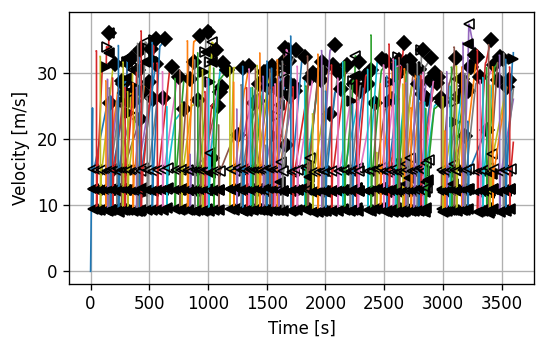

In [ ]:
rec.plot('t', 'v')

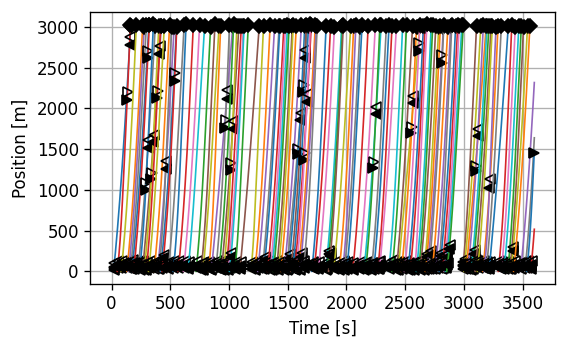

In [ ]:
rec.plot('t', 'x')

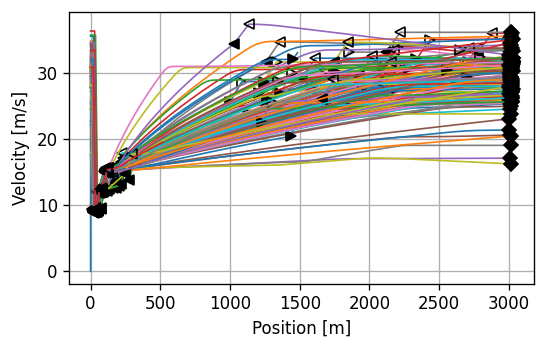

In [ ]:
rec.plot('x', 'v')

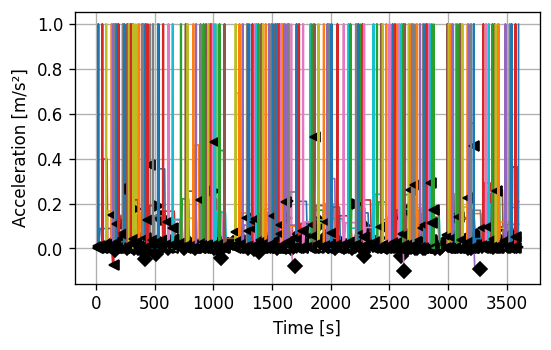

In [ ]:
rec.plot('t', 'a')

In [ ]:
final_data=rec.getEvents()
final_data['start'] = final_data .groupby(['id'])['t'].transform(min)
final_data['end'] = final_data.groupby(['id'])['t'].transform(max)
final_data['duration'] = final_data['end']-final_data['start']
data4 = final_data[final_data['x']>=3000].copy()
DF_Dur = data4[data4['event']=='end'].copy()
average_travelling_time = DF_Dur['duration'].mean()

Final Results of Investigation

In [ ]:
# Density in each lane
# Change the lane id in ['lane']==2]

Lane_Data = final_data[final_data['lane']==2].copy()
VehCnt = Lane_Data['id']
VCnt = VehCnt.max()

print("Traffic Density per Km in all lanes is ", VehCnt.max() / 3)


Traffic Density per Km in all lanes is  41.666666666666664


In [ ]:
Avg_Dis = data4['x'].mean()
Avg_Time = data4['duration'].mean()
Avg_Speed = Avg_Dis / Avg_Time

print("Mean Speed of all Vehicles in all lanes is ", Avg_Speed, " m/s OR ", Avg_Speed * 18 / 5, " Km/Hr")


Mean Speed of all Vehicles in all lanes is  22.6451410987847  m/s OR  81.52250795562492  Km/Hr


In [ ]:
Flow = rec.flow(0) + rec.flow(1) + rec.flow(2)
print("Traffic Flow in all the lanes is ", Flow)

VolHr = (Flow / average_travelling_time ) * 3600

print("Traffic Volume per Hr is : ", VolHr)

Traffic Flow in all the lanes is  128.12
Traffic Volume per Hr is :  3464.7894415143974


In [ ]:
print("Average Travelling Time is : ", average_travelling_time, " secs for 3 Km Motorway")

Average Travelling Time is :  133.11977763312618  secs for 3 Km Motorway


In [ ]:
DF_Dur

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
440,160,3023.42,36.0186,-0.00676893,1,-1,-1,3023.42,end,49.115362,160.0,110.884638
458,163,3011.46,25.4083,0.0329858,0,-1,-1,3011.46,end,0.000000,163.0,163.000000
739,211,3028.01,31.4556,0.0385309,2,-1,-1,3028.01,end,82.160809,211.0,128.839191
1105,265,3024.22,28.8238,0,3,-1,-1,3024.22,end,130.014892,265.0,134.985108
1207,278,3002.24,28.334,0.0294493,4,-1,-1,3002.24,end,144.124014,278.0,133.875986
...,...,...,...,...,...,...,...,...,...,...,...,...
17505,3468,3005.41,28.9953,0.017053,117,-1,-1,3005.41,end,3340.556337,3468.0,127.443663
17605,3489,3007.79,32.4094,0.0353923,118,-1,-1,3007.79,end,3372.699431,3489.0,116.300569
17685,3508,3001.28,32.1074,0.012411,119,-1,-1,3001.28,end,3389.734773,3508.0,118.265227
17835,3542,3004.84,27.9006,0.0593262,120,-1,-1,3004.84,end,3400.379861,3542.0,141.620139


In [ ]:
final_data

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
0,0,0,0,0,0,0,-1,2000,lane info,0.000000,163.0,163.000000
1,0,0,0,0,0,1,-1,3000,lane info,0.000000,163.0,163.000000
2,0,0,0,0,0,2,-1,3000,lane info,0.000000,163.0,163.000000
3,15.9953,0,24.7327,0,0,-1,-1,0,start,0.000000,163.0,163.000000
4,15.9953,0,24.7327,0,0,0,-1,0,enter lane,0.000000,163.0,163.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
17972,3574,78.96,12.4208,0.0503959,125,2,1,78.96,enter lane 2,3568.382934,3577.0,8.617066
17981,3577,120.72,15.4208,1,125,2,1,120.72,leave lane 1,3568.382934,3577.0,8.617066
17982,3577,120.72,15.4208,0,125,2,-1,120.72,done change slow,3568.382934,3577.0,8.617066
18075,3599,1451.38,32.0848,0.0064097,124,2,-1,1451.38,change fast,3535.339656,3599.0,63.660344


Save the data extracted to files in CSV format.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

rec.saveData('/content/drive/My Drive/Colab Notebooks/MLSim_finalrec_C1.csv')
DF_Dur.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_DF_Dur_C1.csv')
final_data.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_FinalData_C1.csv')

Mounted at /content/drive


#Simulation Run - Case 2 


Generate actual traffic for the Motorway to be selected when recording the events on the Motorway.

In [ ]:
random.seed()
traffic = []
for i in range(200):   #generation for 200 vehicles
  r = vtype(0.17, 0.21, 0.62, 0.2)
  traffic.append(r)
  i+=1 

In [ ]:
cycles = cyc()
speed = randomSpeedVariation(traffic[0][1], cyc())
speed

# Variation in Speed

[29.20356636949939,
 28.115392421826645,
 32.9125946737502,
 27.65661055503165,
 29.43149980300844,
 28.67599755448818,
 29.867855478259635,
 28.227065810219692]

Recording the events of the Motorway Section having three lanes for 2 Km and then only 2 lane for another Km.

In [ ]:
VMAX = 120/3.6 # car SUV & LMV
N = 200 # number of points
IAT = 10 # average interarrival time
random.seed(13)
env = simpy.Environment()
rec = Recorder(0, 3600, 1)
iat = [ random.expovariate(1.0/IAT) for i in range(N) ]
l = Lane(rec, 2000, VMAX)
c = Lane(rec, 3000, VMAX)
r = Lane(rec, 3000, VMAX)
l.attachLeft(c)
r.attachRight(c)

stratL = (l,r,c)

t0 = 0
for i in range(N):
  CYCLES = cyc
  CYCLES = random.randint(4, 8) #the parametre is an element of list
  times = randomIntervals(CYCLES)
  speed = randomSpeedVariation(traffic[i][1], CYCLES) #each car has a speed caracteristic gv by the firs element of car
  t0 += iat[i]+10 #REFLECT A CAR IN FONT
  
  CAR_LENGTH = traffic[i][2]
  va_max = traffic[i][3] #the max acceleration is gv each care in the list
  va_min = traffic[i][4]
  print(i, CAR_LENGTH, traffic[i][1], traffic[i][0], t0, iat[i], 3*(traffic[i-1][2] /traffic[i-1][1]))
  FAR_AWAY_IN_FRONT = 200
  FAR_AWAY_IN_BACK = 200

  v = Vehicle(rec, startingLane=l, t0=t0, dx0=speed[-1], t=times, v=speed)
  v = traceOvertake = True

rec.run() 

0 4.452584423412877 28.85758279484319 Car 12.997661135566718 2.997661135566718 0.48728045645928886
1 21.825301601203144 32.06162759694247 TRUCK 34.557681145818755 11.560020010252035 0.46288538320075945
2 6.362576400683825 33.11683095004612 SUV 56.08040447812299 11.52272333230424 2.042189049998618
3 21.150796457745958 29.870279254202188 TRUCK 85.00744606093626 18.927041582813267 0.5763754759881362
4 4.818521838082968 30.230255294524856 SUV 97.06200723735876 2.054561176422501 2.1242650205324516
5 4.823381242940271 28.01083611061314 Car 109.68291217337139 2.6209049360126326 0.4781820521663612
6 21.397203582863586 29.369541571785284 TRUCK 121.27474443740618 1.5918322640347997 0.5165909247292393
7 4.331993967901057 28.512591516959922 Car 133.82576954907802 2.5510251116718217 2.185652458745162
8 22.980218424906248 26.76320889240914 TRUCK 157.06924659168197 13.243477042603947 0.45579799002040455
9 4.479036612759682 30.85813597617221 Car 168.46431610230124 1.3950695106192748 2.5759487792314926

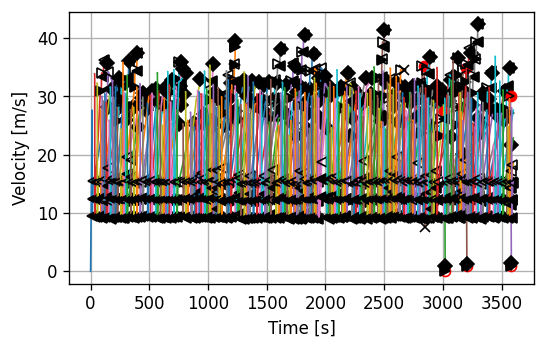

In [ ]:
rec.plot('t', 'v')

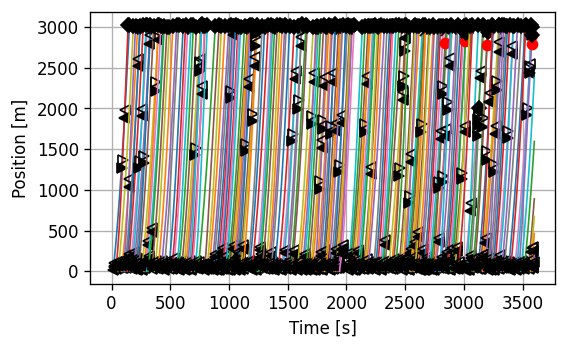

In [ ]:
rec.plot('t', 'x')

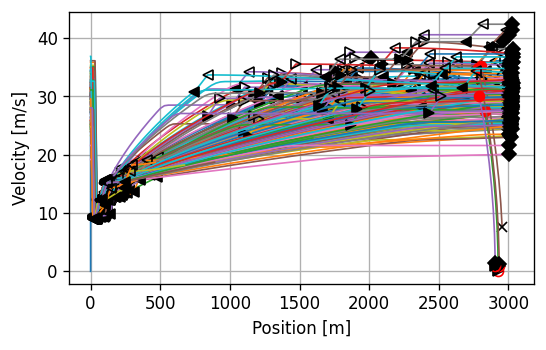

In [ ]:
rec.plot('x', 'v')

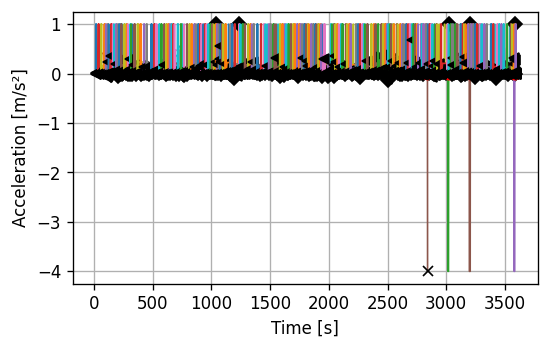

In [ ]:
rec.plot('t', 'a')

In [ ]:
final_data=rec.getEvents()
final_data['start'] = final_data .groupby(['id'])['t'].transform(min)
final_data['end'] = final_data.groupby(['id'])['t'].transform(max)
final_data['duration'] = final_data['end']-final_data['start']
data4 = final_data[final_data['x']>=3000].copy()
DF_Dur = data4[data4['event']=='end'].copy()
average_travelling_time = DF_Dur['duration'].mean()

Final Results of Investigation

In [ ]:
# Density in each lane
# Change the lane id in ['lane']==2]

Lane_Data = final_data[final_data['lane']==2].copy()
VehCnt = Lane_Data['id']
VCnt = VehCnt.max()

print("Traffic Density per Km in all lanes is ", VehCnt.max() / 3)


Traffic Density per Km in all lanes is  63.0


In [ ]:
Avg_Dis = data4['x'].mean()
Avg_Time = data4['duration'].mean()
Avg_Speed = Avg_Dis / Avg_Time

print("Mean Speed of all Vehicles in all lanes is ", Avg_Speed, " m/s OR ", Avg_Speed * 18 / 5, " Km/Hr")


Mean Speed of all Vehicles in all lanes is  22.75492055329137  m/s OR  81.91771399184893  Km/Hr


In [ ]:
Flow = rec.flow(0) + rec.flow(1) + rec.flow(2)
print("Traffic Flow in all the lanes is ", Flow)

VolHr = (Flow / average_travelling_time ) * 3600

print("Traffic Volume per Hr is : ", VolHr)

Traffic Flow in all the lanes is  191.16
Traffic Volume per Hr is :  5194.97843538113


In [ ]:
print("Average Travelling Time is : ", average_travelling_time, " secs for 3 Km Motorway")

Average Travelling Time is :  132.469462300956  secs for 3 Km Motorway


In [ ]:
DF_Dur

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
550,141,3028.21,35.8119,-0.0200745,1,-1,-1,3028.21,end,34.557681,141.0,106.442319
640,152,3022.44,28.1044,0.0368689,0,-1,-1,3022.44,end,0.000000,152.0,152.000000
901,185,3014.21,31.2129,0.0382335,2,-1,-1,3014.21,end,56.080404,185.0,128.919596
1077,204,3013.72,31.5207,-0.0509671,4,-1,-1,3013.72,end,97.062007,204.0,106.937993
1244,222,3003.54,27.7764,0,3,-1,-1,3003.54,end,85.007446,222.0,136.992554
...,...,...,...,...,...,...,...,...,...,...,...,...
26281,3490,3015.99,26.2236,0.0816836,178,-1,-1,3015.99,end,3340.101955,3490.0,149.898045
26498,3522,3018.13,25.9302,0.0236658,179,-1,-1,3018.13,end,3377.488997,3522.0,144.511003
26536,3528,3025.11,31.0109,0.00167602,180,-1,-1,3025.11,end,3394.826519,3528.0,133.173481
26850,3574,3028.95,34.7872,-0.00272358,182,-1,-1,3028.95,end,3445.947399,3574.0,128.052601


In [ ]:
final_data

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
0,0,0,0,0,0,0,-1,2000,lane info,0.000000,152.0,152.000000
1,0,0,0,0,0,1,-1,3000,lane info,0.000000,152.0,152.000000
2,0,0,0,0,0,2,-1,3000,lane info,0.000000,152.0,152.000000
3,12.9977,0,27.6442,0,0,-1,-1,0,start,0.000000,152.0,152.000000
4,12.9977,0,27.6442,0,0,0,-1,0,enter lane,0.000000,152.0,152.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
26985,3591,66.88,12.1783,0,189,1,-1,66.88,done change slow,3585.579597,3595.0,9.420403
26998,3592,79.06,12.1882,0.0197821,189,1,-1,79.06,change slow,3585.579597,3595.0,9.420403
26999,3592,79.06,12.1882,0.0197821,189,2,1,79.06,enter lane 2,3585.579597,3595.0,9.420403
27012,3595,120.13,15.1882,1,189,2,1,120.13,leave lane 1,3585.579597,3595.0,9.420403


Save the data extracted to files in CSV format.

In [ ]:
rec.saveData('/content/drive/My Drive/Colab Notebooks/MLSim_finalrec_C2.csv')
DF_Dur.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_DF_Dur_C2.csv')
final_data.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_FinalData_C2.csv')

#Simulation Run - Case 3 


Generate actual traffic for the Motorway to be selected when recording the events on the Motorway.

In [86]:
random.seed()
traffic = []
for i in range(200):   #generation for 1000 vehicle
  r = vtype(0.07, 0.15, 0.78, 0.5)
  traffic.append(r)
  i+=1 

In [87]:
cycles = cyc()
speed = randomSpeedVariation(traffic[0][1], cyc())
speed

# Variation in speed

[35.526497879013434,
 34.00475322736942,
 35.411937296484574,
 34.63438894055451,
 35.60174494789286,
 34.5554949921144,
 38.40603493815096,
 32.623893277978844,
 37.77537634108528]

Recording the events of the Motorway Section having three lanes for 2 Km and then only 2 lane for another Km.

In [88]:
VMAX = 120/3.6 # car SUV & LMV
N = 200 # number of points
IAT = 15 # average interarrival time
random.seed(13)
env = simpy.Environment()
rec = Recorder(0, 3600, 1)
iat = [ random.expovariate(1.0/IAT) for i in range(N) ]
l = Lane(rec, 2000, VMAX)
c = Lane(rec, 3000, VMAX)
r = Lane(rec, 3000, VMAX)
l.attachLeft(c)
r.attachRight(c)

stratL = (l,r,c)

t0 = 0
for i in range(N):
  CYCLES = cyc
  CYCLES = random.randint(4, 8) #the parametre is an element of list
  times = randomIntervals(CYCLES)
  speed = randomSpeedVariation(traffic[i][1], CYCLES) #each car has a speed caracteristic gv by the firs element of car
  t0 += iat[i]+10 #REFLECT A CAR IN FONT
  
  CAR_LENGTH = traffic[i][2]
  va_max = traffic[i][3] #the max acceleration is gv each care in the list
  va_min = traffic[i][4]
  print(i, CAR_LENGTH, traffic[i][1], traffic[i][0], t0, iat[i], 3*(traffic[i-1][2] /traffic[i-1][1]))
  FAR_AWAY_IN_FRONT = 200
  FAR_AWAY_IN_BACK = 200

  v = Vehicle(rec, startingLane=l, t0=t0, dx0=speed[-1], t=times, v=speed)
  v = traceOvertake = True

rec.run() 

0 21.249871488572737 35.35873263680859 TRUCK 14.496491703350078 4.4964917033500775 0.4249385073286731
1 4.8611179013693295 31.345891551700277 Car 41.836521718728136 17.340030015378055 1.8029383326752666
2 4.3557267428150945 32.2050933348406 Car 69.1206067171845 17.28408499845636 0.46523971666446196
3 4.725697812239418 25.31006392598522 Car 107.51116909140441 28.390562374219904 0.4057488699872436
4 4.595326248930909 31.564469681526152 Car 120.59301085603816 3.0818417646337517 0.5601366111984799
5 4.569765666534543 29.335031185778757 SUV 134.52436826005712 3.9313574040189496 0.43675622894628563
6 21.19965160562248 31.072918138895496 TRUCK 146.9121166561093 2.3877483960521997 0.4673353477207046
7 4.313250528399498 29.560163993965965 Car 160.73865432361703 3.8265376675077327 2.046764791532647
8 4.334132869814081 30.692237003193252 Car 190.60386988752296 19.865215563905924 0.43774288897178826
9 4.590537429220685 27.185895234934808 Car 202.69647415345187 2.0926042659289124 0.4236380231290882

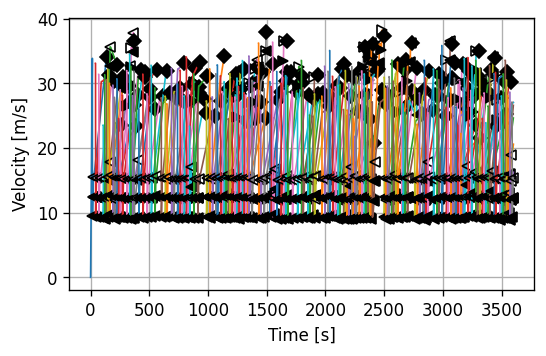

In [89]:
rec.plot('t', 'v')

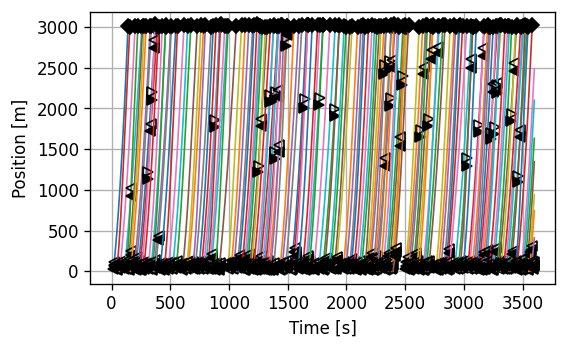

In [90]:
rec.plot('t', 'x')

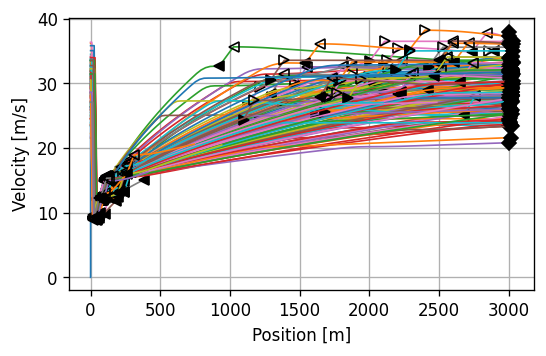

In [91]:
rec.plot('x', 'v')

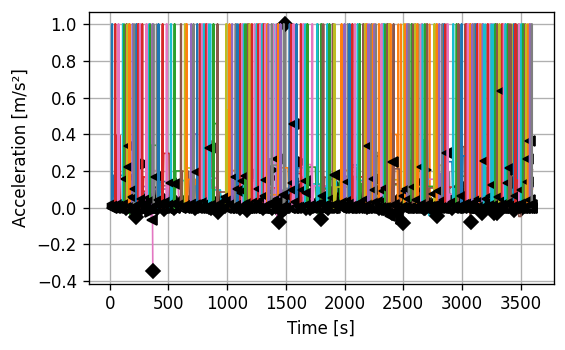

In [92]:
rec.plot('t', 'a')

In [93]:
final_data=rec.getEvents()
final_data['start'] = final_data .groupby(['id'])['t'].transform(min)
final_data['end'] = final_data.groupby(['id'])['t'].transform(max)
final_data['duration'] = final_data['end']-final_data['start']
data4 = final_data[final_data['x']>=3000].copy()
DF_Dur = data4[data4['event']=='end'].copy()
average_travelling_time = DF_Dur['duration'].mean()

Final Results of Investigation

In [94]:
# Density in each lane
# Change the lane id in ['lane']==2]

Lane_Data = final_data[final_data['lane']==2].copy()
VehCnt = Lane_Data['id']
VCnt = VehCnt.max()

print("Traffic Density per Km in all lanes is ", VehCnt.max() / 3)


Traffic Density per Km in all lanes is  52.333333333333336


In [95]:
Avg_Dis = data4['x'].mean()
Avg_Time = data4['duration'].mean()
Avg_Speed = Avg_Dis / Avg_Time

print("Mean Speed of all Vehicles in all lanes is ", Avg_Speed, " m/s OR ", Avg_Speed * 18 / 5, " Km/Hr")


Mean Speed of all Vehicles in all lanes is  22.749875016710646  m/s OR  81.89955006015832  Km/Hr


In [96]:
Flow = rec.flow(0) + rec.flow(1) + rec.flow(2)
print("Traffic Flow in all the lanes is ", Flow)

VolHr = (Flow / average_travelling_time ) * 3600

print("Traffic Volume per Hr is : ", VolHr)

Traffic Flow in all the lanes is  156.99
Traffic Volume per Hr is :  4265.6010939116495


In [97]:
print("Average Travelling Time is : ", average_travelling_time, " secs for 3 Km Motorway")

Average Travelling Time is :  132.49340188107752  secs for 3 Km Motorway


In [98]:
DF_Dur

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
403,139.823,3011.15,34.0163,-2.09902e-16,0,-1,-1,3011.15,end,0.000000,139.823378,139.823378
500,155,3001.34,31.3228,0.0185703,1,-1,-1,3001.34,end,41.836522,155.000000,113.163478
803,200,3015.53,30.4279,0.0371809,2,-1,-1,3015.53,end,69.120607,200.000000,130.879393
981,224,3017.95,32.839,-0.0521057,4,-1,-1,3017.95,end,120.593011,224.000000,103.406989
1270,258,3002.93,23.5359,0,3,-1,-1,3002.93,end,107.511169,258.000000,150.488831
...,...,...,...,...,...,...,...,...,...,...,...,...
21613,3507,3008.18,23.9059,0,145,-1,-1,3008.18,end,3366.482387,3507.000000,140.517613
21741,3524,3029.91,30.3922,0.0374013,147,-1,-1,3029.91,end,3397.255209,3524.000000,126.744791
21840,3538,3014.18,25.3356,0.0735643,146,-1,-1,3014.18,end,3385.045301,3538.000000,152.954699
21902,3546,3000.59,31.7213,0.014064,148,-1,-1,3000.59,end,3437.133800,3546.000000,108.866200


In [99]:
final_data

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
0,0,0,0,0,0,0,-1,2000,lane info,0.000000,139.823378,139.823378
1,0,0,0,0,0,1,-1,3000,lane info,0.000000,139.823378,139.823378
2,0,0,0,0,0,2,-1,3000,lane info,0.000000,139.823378,139.823378
3,14.4965,0,33.872,0,0,-1,-1,0,start,0.000000,139.823378,139.823378
4,14.4965,0,33.872,0,0,0,-1,0,enter lane,0.000000,139.823378,139.823378
...,...,...,...,...,...,...,...,...,...,...,...,...
22277,3594,60.98,12.3244,0,157,1,-1,60.98,done change slow,3589.455174,3598.000000,8.544826
22294,3595,73.31,12.3327,0.0166132,157,1,-1,73.31,change slow,3589.455174,3598.000000,8.544826
22295,3595,73.31,12.3327,0.0166132,157,2,1,73.31,enter lane 2,3589.455174,3598.000000,8.544826
22312,3598,114.8,15.3327,1,157,2,1,114.8,leave lane 1,3589.455174,3598.000000,8.544826


Save the data extracted to files in CSV format.

In [100]:
rec.saveData('/content/drive/My Drive/Colab Notebooks/MLSim_finalrec_C3.csv')
DF_Dur.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_DF_Dur_C3.csv')
final_data.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_FinalData_C3.csv')

#Simulation Run - Case 4 


Generate actual traffic for the Motorway to be selected when recording the events on the Motorway.

In [ ]:
random.seed()
traffic = []
for i in range(200):   #generation for 1000 vehicle
  r = vtype(0.07, 0.15, 0.78, 0.2)
  traffic.append(r)
  i+=1 

In [ ]:
cycles = cyc()
speed = randomSpeedVariation(traffic[0][1], cyc())
speed

# Variation in speed

[32.182327542829206,
 28.181600831559944,
 29.598281489829088,
 28.618879374854288,
 32.224540237034155,
 28.548498887978933,
 30.577777324866727,
 28.7531576332281,
 30.40788550224815,
 27.157568801343928]

Recording the events of the Motorway Section having three lanes for 2 Km and then only 2 lane for another Km.

In [ ]:
VMAX = 120/3.6 # car SUV & LMV
N = 200 # number of points
IAT = 5 # average interarrival time
random.seed(13)
env = simpy.Environment()
rec = Recorder(0, 3600, 1)
iat = [ random.expovariate(1.0/IAT) for i in range(N) ]
l = Lane(rec, 2000, VMAX)
c = Lane(rec, 3000, VMAX)
r = Lane(rec, 3000, VMAX)
l.attachLeft(c)
r.attachRight(c)

stratL = (l,r,c)

t0 = 0
for i in range(N):
  CYCLES = cyc
  CYCLES = random.randint(4, 8) #the parametre is an element of list
  times = randomIntervals(CYCLES)
  speed = randomSpeedVariation(traffic[i][1], CYCLES) #each car has a speed caracteristic gv by the firs element of car
  t0 += iat[i]+10 #REFLECT A CAR IN FONT
  
  CAR_LENGTH = traffic[i][2]
  va_max = traffic[i][3] #the max acceleration is gv each care in the list
  va_min = traffic[i][4]
  print(i, CAR_LENGTH, traffic[i][1], traffic[i][0], t0, iat[i], 3*(traffic[i-1][2] /traffic[i-1][1]))
  FAR_AWAY_IN_FRONT = 200
  FAR_AWAY_IN_BACK = 200

  v = Vehicle(rec, startingLane=l, t0=t0, dx0=speed[-1], t=times, v=speed)
  v = traceOvertake = True

rec.run() 

0 4.910070534582631 29.400725070908678 SUV 11.49883056778336 1.498830567783359 0.425047333492377
1 4.686933367713061 30.36370385488577 Car 27.278840572909377 5.780010005126018 0.501015249393393
2 4.563331182823125 31.59665207514012 Car 43.0402022390615 5.76136166615212 0.4630792136011656
3 4.718631666056028 29.541459376327982 Car 62.50372303046814 9.463520791406633 0.43327354796682727
4 4.739676988677121 33.071407800644806 Car 73.53100361867939 1.0272805882112506 0.4791873961890799
5 4.376944018159281 33.10855516040029 Car 84.84145608668571 1.3104524680063163 0.4299493705180016
6 4.6840952134683445 35.64969863266506 Car 95.6373722187031 0.7959161320173999 0.3965993680746015
7 4.466146095270962 32.617682511394435 Car 106.91288477453902 1.2755125558359108 0.39417684242439077
8 4.350786919701357 27.82849865004033 Car 123.534623295841 6.621738521301974 0.4107722331631737
9 4.8448826950876445 28.30680067909466 Car 134.23215805115063 0.6975347553096374 0.46902856396405546
10 4.68154145745889

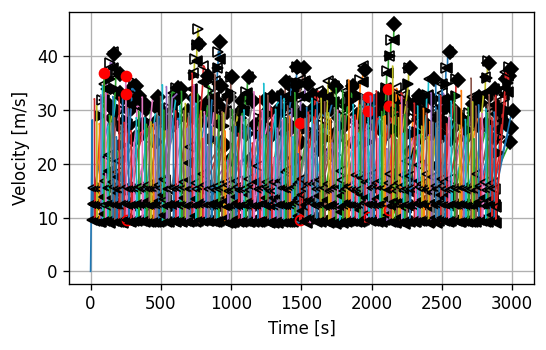

In [ ]:
rec.plot('t', 'v')

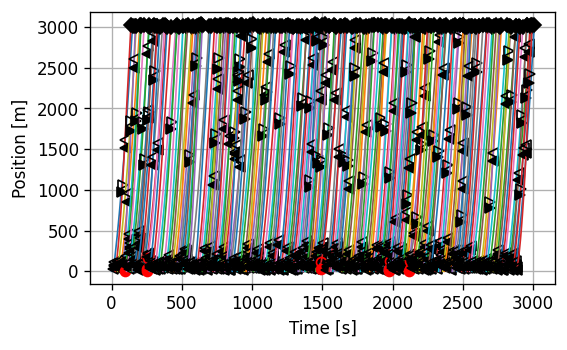

In [ ]:
rec.plot('t', 'x')

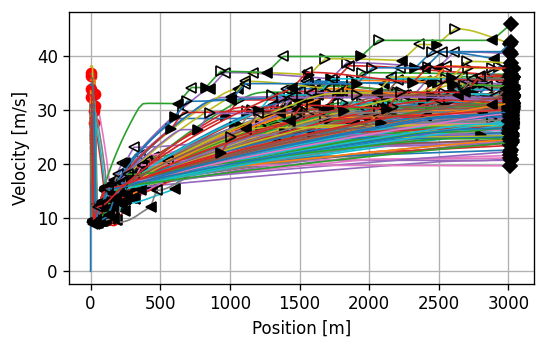

In [ ]:
rec.plot('x', 'v')

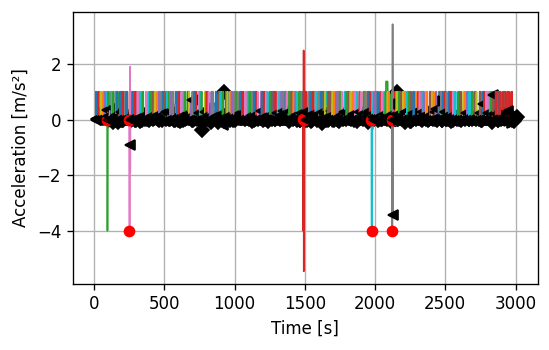

In [ ]:
rec.plot('t', 'a')

In [ ]:
final_data=rec.getEvents()
final_data['start'] = final_data .groupby(['id'])['t'].transform(min)
final_data['end'] = final_data.groupby(['id'])['t'].transform(max)
final_data['duration'] = final_data['end']-final_data['start']
data4 = final_data[final_data['x']>=3000].copy()
DF_Dur = data4[data4['event']=='end'].copy()
average_travelling_time = DF_Dur['duration'].mean()

Final Results of Investigation

In [ ]:
# Density in each lane
# Change the lane id in ['lane']==2]

Lane_Data = final_data[final_data['lane']==2].copy()
VehCnt = Lane_Data['id']
VCnt = VehCnt.max()

print("Traffic Density per Km in all lanes is ", VehCnt.max() / 3)


Traffic Density per Km in all lanes is  66.33333333333333


In [ ]:
Avg_Dis = data4['x'].mean()
Avg_Time = data4['duration'].mean()
Avg_Speed = Avg_Dis / Avg_Time

print("Mean Speed of all Vehicles in all lanes is ", Avg_Speed, " m/s OR ", Avg_Speed * 18 / 5, " Km/Hr")


Mean Speed of all Vehicles in all lanes is  22.6323931574251  m/s OR  81.47661536673036  Km/Hr


In [ ]:
Flow = rec.flow(0) + rec.flow(1) + rec.flow(2)
print("Traffic Flow in all the lanes is ", Flow)

VolHr = (Flow / average_travelling_time ) * 3600

print("Traffic Volume per Hr is : ", VolHr)

Traffic Flow in all the lanes is  249.15
Traffic Volume per Hr is :  6732.917596909842


In [ ]:
print("Average Travelling Time is : ", average_travelling_time, " secs for 3 Km Motorway")

Average Travelling Time is :  133.21713612114635  secs for 3 Km Motorway


In [ ]:
DF_Dur

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
722,138,3030.36,30.7668,-0.10412,1,-1,-1,3030.36,end,27.278841,138.0,110.721159
828,149,3017.43,28.5582,0.0375628,0,-1,-1,3017.43,end,0.000000,149.0,149.000000
1052,170,3018.55,40.4488,-0.0782969,4,-1,-1,3018.55,end,73.531004,170.0,96.468996
1104,175,3007.92,29.8895,0.0364785,2,-1,-1,3007.92,end,43.040202,175.0,131.959798
1381,201,3021.79,27.4706,0,3,-1,-1,3021.79,end,62.503723,201.0,138.496277
...,...,...,...,...,...,...,...,...,...,...,...,...
29247,2977,3013.23,36.2786,0,197,-1,-1,3013.23,end,2855.727686,2977.0,121.272314
29272,2983,3022.78,24.0164,0.0591591,194,-1,-1,3022.78,end,2824.851379,2983.0,158.148621
29302,2992,3030.72,37.7137,-0.0413347,199,-1,-1,3030.72,end,2882.784615,2992.0,109.215385
29305,2993,3014.48,26.5725,0.00803738,196,-1,-1,3014.48,end,2845.573297,2993.0,147.426703


In [ ]:
final_data

,t,x,v,a,id,lane,oldLane,pos,event,start,end,duration
0,0,0,0,0,0,0,-1,2000,lane info,0.000000,149.0,149.000000
1,0,0,0,0,0,1,-1,3000,lane info,0.000000,149.0,149.000000
2,0,0,0,0,0,2,-1,3000,lane info,0.000000,149.0,149.000000
3,11.4988,0,28.1645,0,0,-1,-1,0,start,0.000000,149.0,149.000000
4,11.4988,0,28.1645,0,0,0,-1,0,enter lane,0.000000,149.0,149.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
29302,2992,3030.72,37.7137,-0.0413347,199,-1,-1,3030.72,end,2882.784615,2992.0,109.215385
29304,2993,3014.48,26.5725,0.00803738,196,2,-1,3014.48,leave lane,2845.573297,2993.0,147.426703
29305,2993,3014.48,26.5725,0.00803738,196,-1,-1,3014.48,end,2845.573297,2993.0,147.426703
29321,3008,3026.36,29.7335,0.080814,198,2,-1,3026.36,leave lane,2872.217907,3008.0,135.782093


Save the data extracted to files in CSV format.

In [ ]:
rec.saveData('/content/drive/My Drive/Colab Notebooks/MLSim_finalrec_C4.csv')
DF_Dur.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_DF_Dur_C4.csv')
final_data.to_csv('/content/drive/My Drive/Colab Notebooks/MLSim_FinalData_C4.csv')